<a href="https://colab.research.google.com/github/PabloP150/proyecto_sp/blob/main/Proyecto__SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Model

In [1]:
import pandas as pd
import seaborn as sb
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # import for R^2
import numpy as np # Necesario para np.mean en el análisis de errores

AUTOTUNE = tf.data.AUTOTUNE


### Get the data
First download and import the dataset using pandas:

In [2]:
column_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'strength']

#No missing values in the dataset so no need of "na_values" parameter

#link dataset : https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
raw_dataset = pd.read_excel('./Concrete_Data.xls',
                   names=column_names)

raw_dataset.describe()


cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          strength  
count  1030.000000  
mean     35.817836  
std      16.705679  
min       2.331808  
25%      23.707115  
50%      34.442774  
75%      46.136287  
max      82.599225

In [3]:
raw_dataset.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

In [4]:
#No categorical values so no need of mappin with feature engineering
raw_dataset.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age   strength  
0            1040.0           676.0   28  79.986111  
1            1055.0           676.0   28  61.887366  
2             932.0           594.0  270  40.269535  
3             932.0           594.0  365  41.052780  
4             978.4           825.5  360  44.296075

### Inspect the data

Review the joint distribution of a few pairs of columns from the training set.

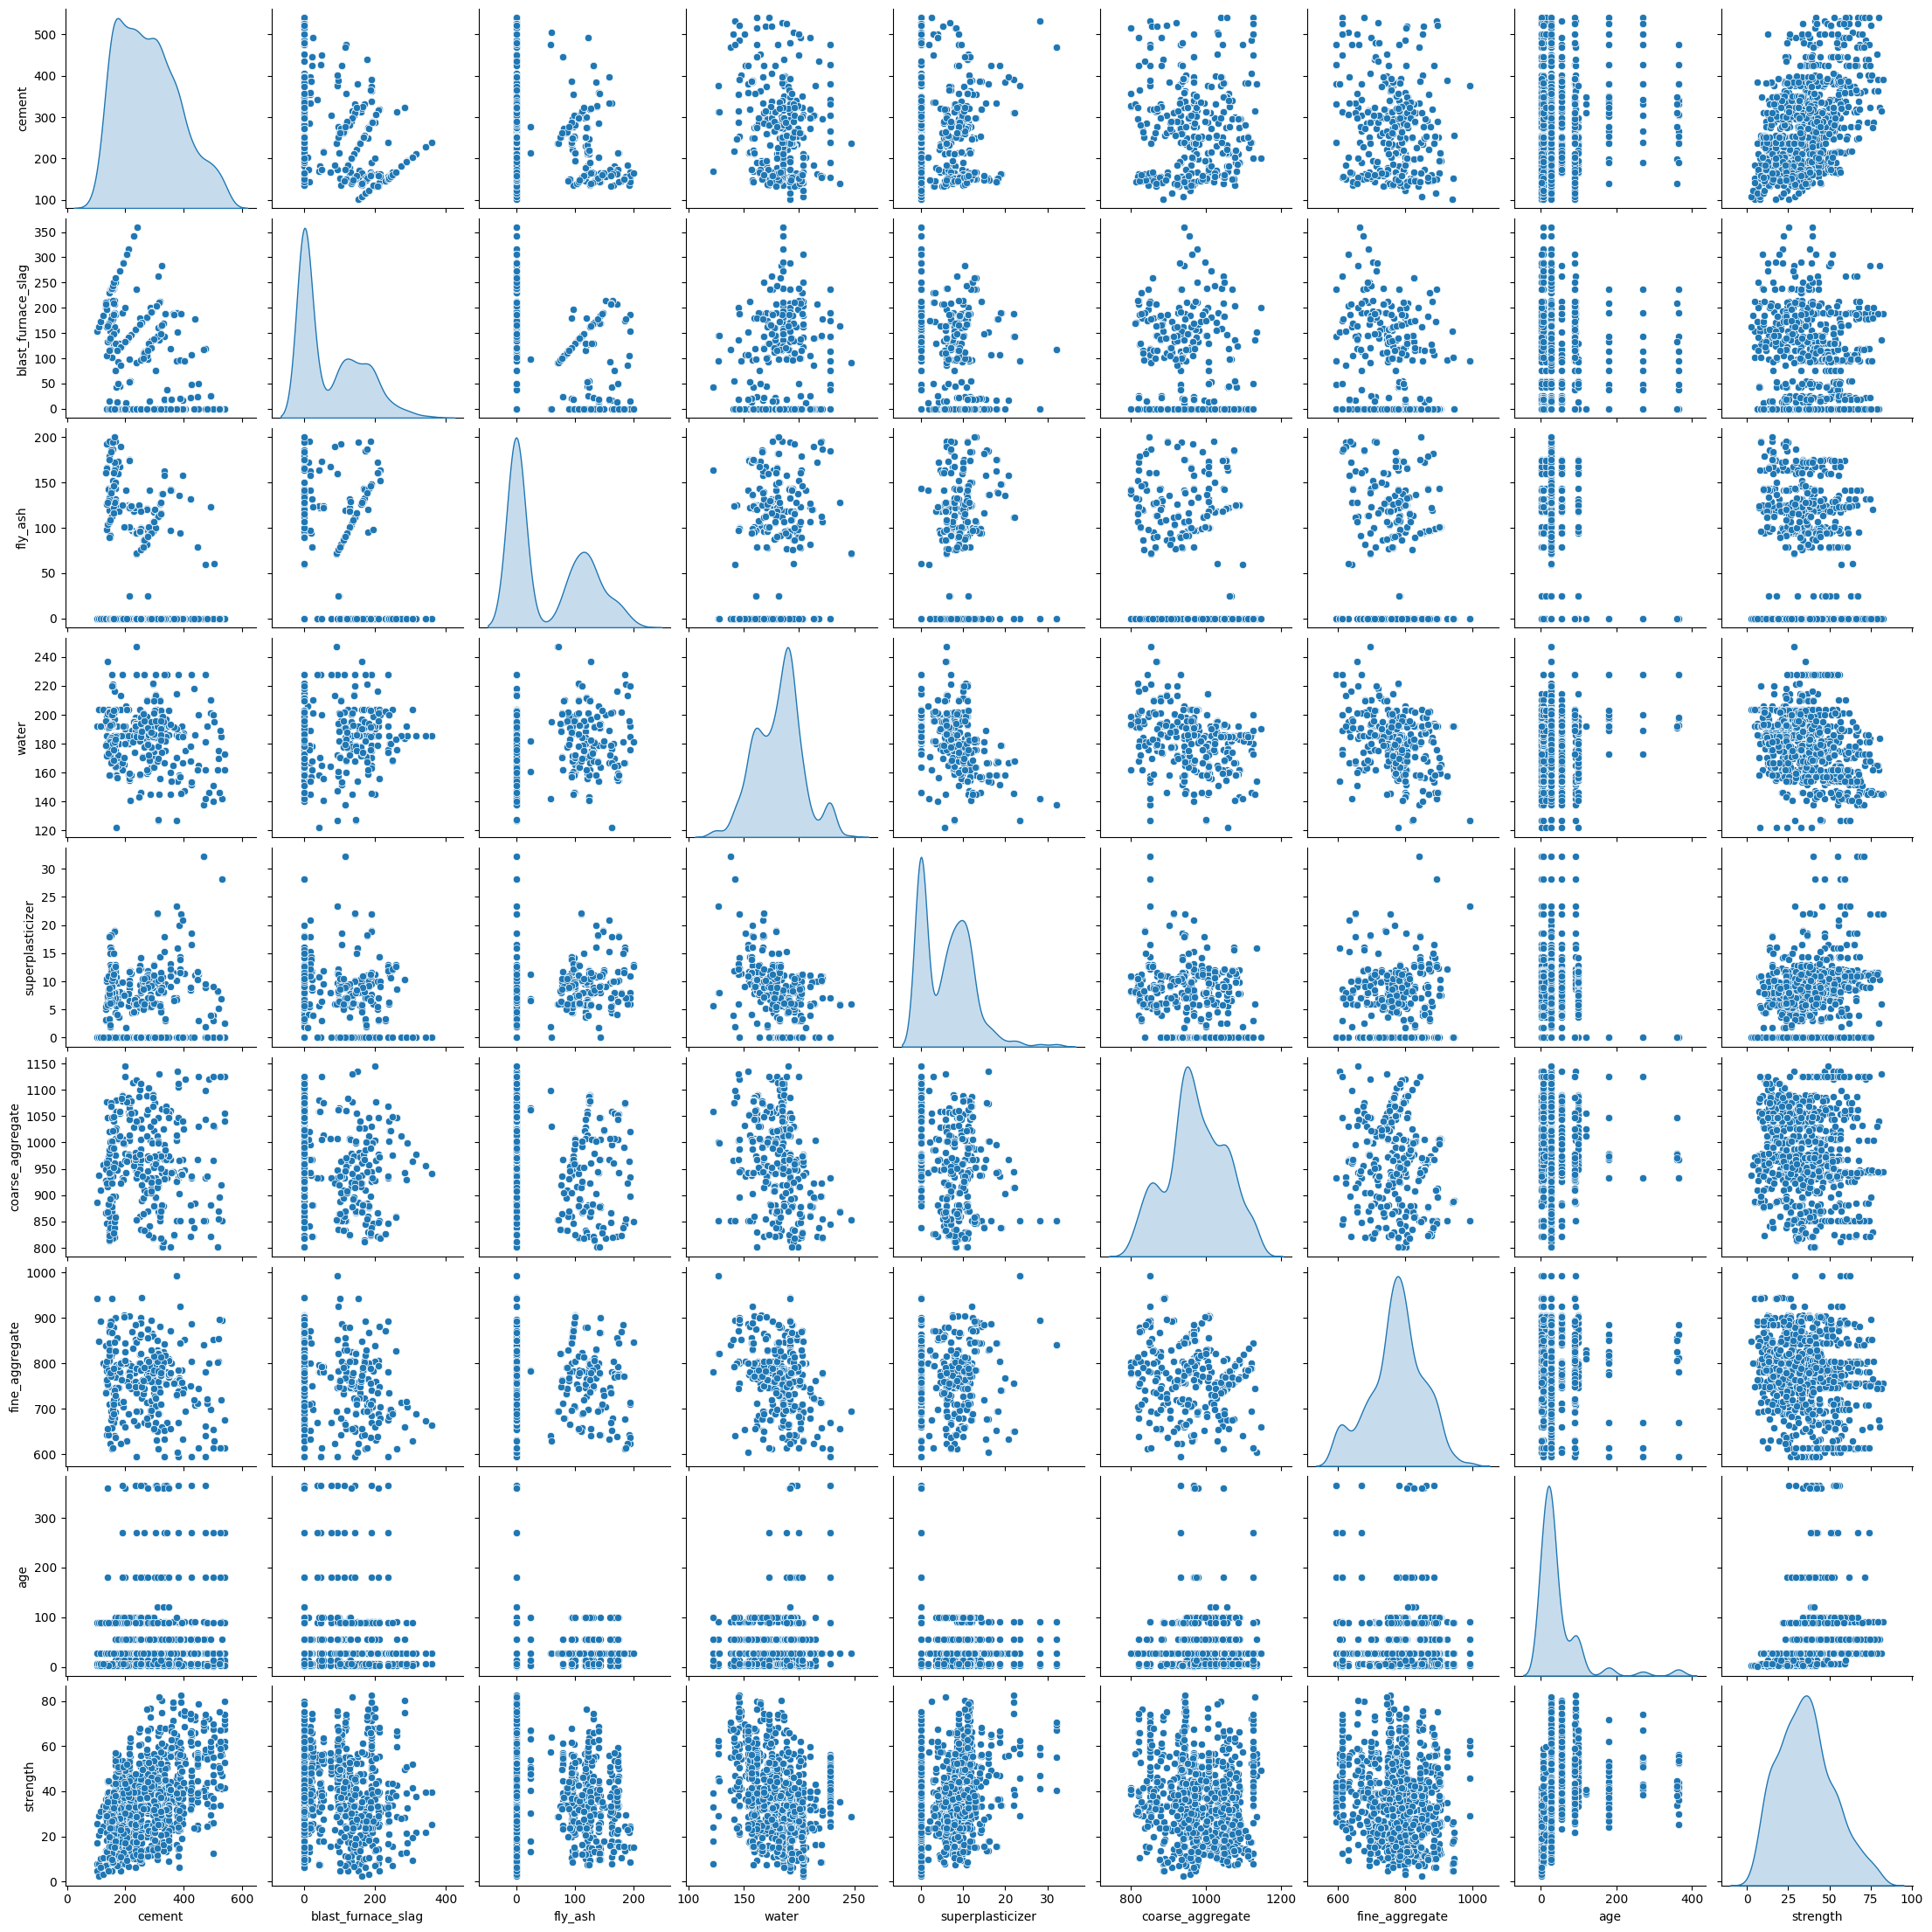

In [5]:
# Analysis of which method to use:
# --- Min-Max Scaling: Use this when you want to scale the data to a specific range (e.g., [0, 1]) and when the
#     distribution of the data is not Gaussian.

# --- Standardization: Use this when the data has a Gaussian distribution or when you want to center the data
#     around 0 with a standard deviation of 1.

sb.pairplot(raw_dataset[column_names], diag_kind='kde')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

In [6]:
# mean - standar deviation
raw_dataset.describe().transpose()[['mean', 'std']]

mean         std
cement              281.165631  104.507142
blast_furnace_slag   73.895485   86.279104
fly_ash              54.187136   63.996469
water               181.566359   21.355567
superplasticizer      6.203112    5.973492
coarse_aggregate    972.918592   77.753818
fine_aggregate      773.578883   80.175427
age                  45.662136   63.169912
strength             35.817836   16.705679

In [7]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(raw_dataset.drop(columns=['strength']))
normalized_dataset = pd.DataFrame(normalized_data, columns=raw_dataset.drop(columns=['strength']).columns)
normalized_dataset['strength'] = raw_dataset['strength']
normalized_dataset.head()
normalized_dataset.describe()


cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean      0.409054            0.205608     0.270800     0.477576   
std       0.238601            0.240064     0.319822     0.170504   
min       0.000000            0.000000     0.000000     0.000000   
25%       0.206336            0.000000     0.000000     0.344511   
50%       0.390183            0.061213     0.000000     0.504990   
75%       0.566210            0.397746     0.591054     0.560878   
max       1.000000            1.000000     1.000000     1.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           0.192643          0.499763        0.450524     0.122698   
std            0.185512          0.226029        0.201143     0.173544   
min            0.000000          0.000000        0.000000     0.000000   
25%            0.000000          0.380814        0.343578     0.016484   
50%            0.197205          0.485465        0.465404     0.074176   
75%            0.315528          0.663953        0.577020     0.151099   
max            1.000000          1.000000        1.000000     1.000000   

          strength  
count  1030.000000  
mean     35.817836  
std      16.705679  
min       2.331808  
25%      23.707115  
50%      34.442774  
75%      46.136287  
max      82.599225

### Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [8]:
train_dataset = normalized_dataset.sample(frac=0.8, random_state=0)
test_dataset = normalized_dataset.drop(train_dataset.index)

independent_variables = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
dependent_variables = ['strength']

train_set = train_dataset[independent_variables]
train_target = train_dataset[dependent_variables]

test_set = test_dataset[independent_variables]
test_target = test_dataset[dependent_variables]

<Axes: >

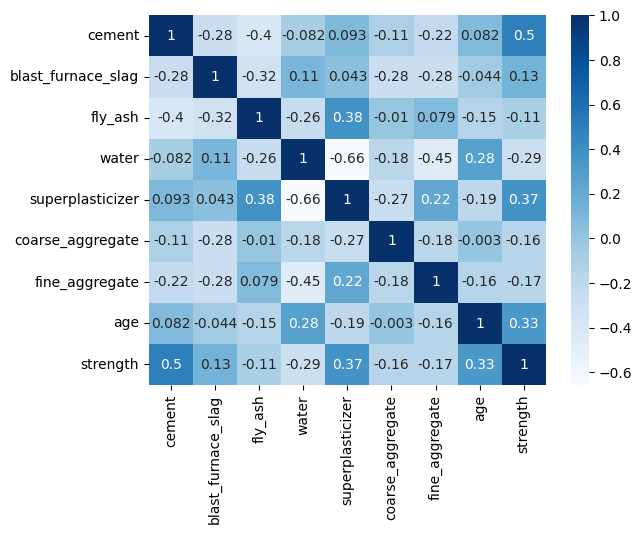

In [9]:
corr = raw_dataset.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [10]:
train_set

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
747  0.908676            0.000000  0.000000  0.624750          0.000000   
718  0.047032            0.511686  0.000000  0.652695          0.000000   
175  0.594977            0.525876  0.000000  0.344511          0.360248   
828  0.958904            0.000000  0.000000  0.193613          0.000000   
713  0.125571            0.656650  0.000000  0.560878          0.000000   
..        ...                 ...       ...       ...               ...   
673  0.251142            0.393155  0.000000  0.652695          0.000000   
595  0.192237            0.345298  0.000000  0.510579          0.000000   
445  0.143836            0.000056  0.717491  0.335808          0.000000   
117  0.482420            0.729549  0.000000  0.429142          0.267081   
464  0.148402            0.209794  0.834583  0.337565          0.245652   

     coarse_aggregate  fine_aggregate       age  
747          0.941860        0.047667  0.005495  
718          0.456977        0.517060  0.016484  
175          0.417733        0.405921  0.247253  
828          0.276163        0.757652  0.074176  
713          0.390698        0.469644  0.005495  
..                ...             ...       ...  
673          0.501163        0.391370  0.016484  
595          0.820930        0.427245  0.074176  
445          0.594767        0.769945  0.151099  
117          0.714826        0.044656  0.074176  
464          0.599709        0.441796  0.271978  

[824 rows x 8 columns]

In [11]:
test_set

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
11    0.220548            0.368392  0.000000  0.560878          0.000000   
19    0.851598            0.000000  0.000000  0.848303          0.000000   
23    0.085845            0.582638  0.000000  0.560878          0.000000   
25    0.634703            0.000000  0.000000  0.848303          0.000000   
28    0.743151            0.132165  0.000000  0.848303          0.000000   
...        ...                 ...       ...       ...               ...   
999   0.111644            0.000000  0.919040  0.358084          0.360248   
1003  0.602740            0.520312  0.000000  0.555289          0.204969   
1014  0.068493            0.574569  0.804098  0.456287          0.170807   
1018  0.500913            0.000000  0.639180  0.485030          0.357143   
1021  0.447945            0.000000  0.534733  0.702196          0.344720   

      coarse_aggregate  fine_aggregate       age  
11            0.515698        0.580783  0.074176  
19            0.380814        0.000000  0.491758  
23            0.715116        0.534119  0.491758  
25            0.380814        0.190667  0.739011  
28            0.380814        0.000000  0.074176  
...                ...             ...       ...  
999           0.552907        0.447065  0.074176  
1003          0.067733        0.408680  0.074176  
1014          0.191570        0.355243  0.074176  
1018          0.200872        0.465881  0.074176  
1021          0.228488        0.376819  0.074176  

[206 rows x 8 columns]

In [68]:
# ESTO HAY QUE CAMBIARLO (AUN NO ESTA LA ARQUITECTURA DE LA RED NEURONAL)
#https://www.tensorflow.org/tutorials/keras/regression?hl=es-419

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#1. Tasa de aprendizaje variable UTILIZAR MRSE O MAE

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5,)

model.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 16,
          validation_split=0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1426.4390 - root_mean_squared_error: 37.7596 - val_loss: 1175.3595 - val_root_mean_squared_error: 34.2835
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 952.1599 - root_mean_squared_error: 30.8112 - val_loss: 541.0576 - val_root_mean_squared_error: 23.2606
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 390.9339 - root_mean_squared_error: 19.7196 - val_loss: 254.9285 - val_root_mean_squared_error: 15.9665
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 238.1389 - root_mean_squared_error: 15.4271 - val_loss: 231.8694 - val_root_mean_squared_error: 15.2273
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 201.2518 - root_mean_squared_error: 14.1717 - val_loss: 215.1644 - val_root_mean_squared_error: 14.6685
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.1839 - root_mean_squared_error: 13.8566 - val_loss: 190.5899 - val_root_mean_squared_error: 13.8054
Epoch 7/100
42/42 ━━

In [19]:
model.evaluate(x=test_set, y=test_target, batch_size=128)
r2 = r2_score(test_target, test_predictions)
print(f"R-squared (R²) in the test set: {r2:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 67.8327 - root_mean_squared_error: 8.2340
R-squared (R²) in the test set: -4.4195


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


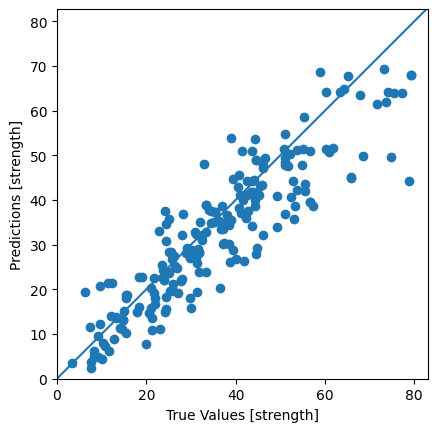

In [21]:
#Se comparan predicciones (test_prediction) se comparan con
#los valores reales (test_target)
test_predictions = model.predict(test_set).flatten()

#Graphic interpretation: if the model were perfect, every point would
#be on the diagonal line where (test_target = test_prediction)
plt.scatter(test_target, test_predictions)
plt.xlabel('True Values [strength]')
plt.ylabel('Predictions [strength]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


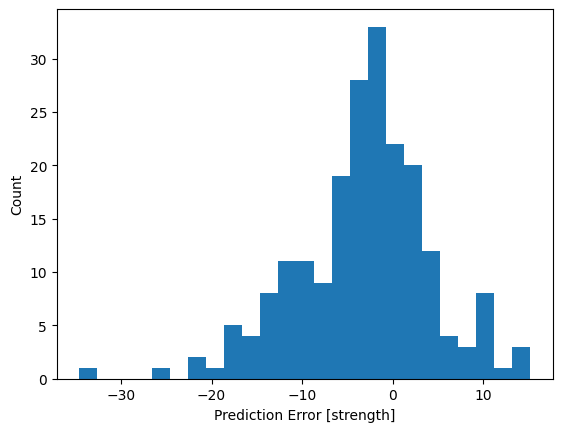

In [22]:
# test_predictions: Son las predicciones del modelo para la variable
# objetivo (strength).

# test_target['strength'].values: Son los valores reales de la variable
# objetivo (strength).

error = test_predictions - test_target['strength'].values
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [strength]")
_ = plt.ylabel("Count")

# Second Model

##Get the Data

In [23]:
column_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'strength']

raw_dataset = pd.read_excel('Concrete_Data.xls', names=column_names)

In [24]:
# Initial data check (you can uncomment to see the output))
print("Initial description of the dataset:")
print(raw_dataset.describe().transpose())
print("\nDataset columns:")
print(raw_dataset.columns)
print("\nFirst 5 rows of the dataset:")
print(raw_dataset.head())


Initial description of the dataset:
                     count        mean         std         min         25%  \
cement              1030.0  281.165631  104.507142  102.000000  192.375000   
blast_furnace_slag  1030.0   73.895485   86.279104    0.000000    0.000000   
fly_ash             1030.0   54.187136   63.996469    0.000000    0.000000   
water               1030.0  181.566359   21.355567  121.750000  164.900000   
superplasticizer    1030.0    6.203112    5.973492    0.000000    0.000000   
coarse_aggregate    1030.0  972.918592   77.753818  801.000000  932.000000   
fine_aggregate      1030.0  773.578883   80.175427  594.000000  730.950000   
age                 1030.0   45.662136   63.169912    1.000000    7.000000   
strength            1030.0   35.817836   16.705679    2.331808   23.707115   

                           50%          75%          max  
cement              272.900000   350.000000   540.000000  
blast_furnace_slag   22.000000   142.950000   359.400000  
fly_as

## Inspect the data and Normalization


Generando pairplot para inspección de datos...


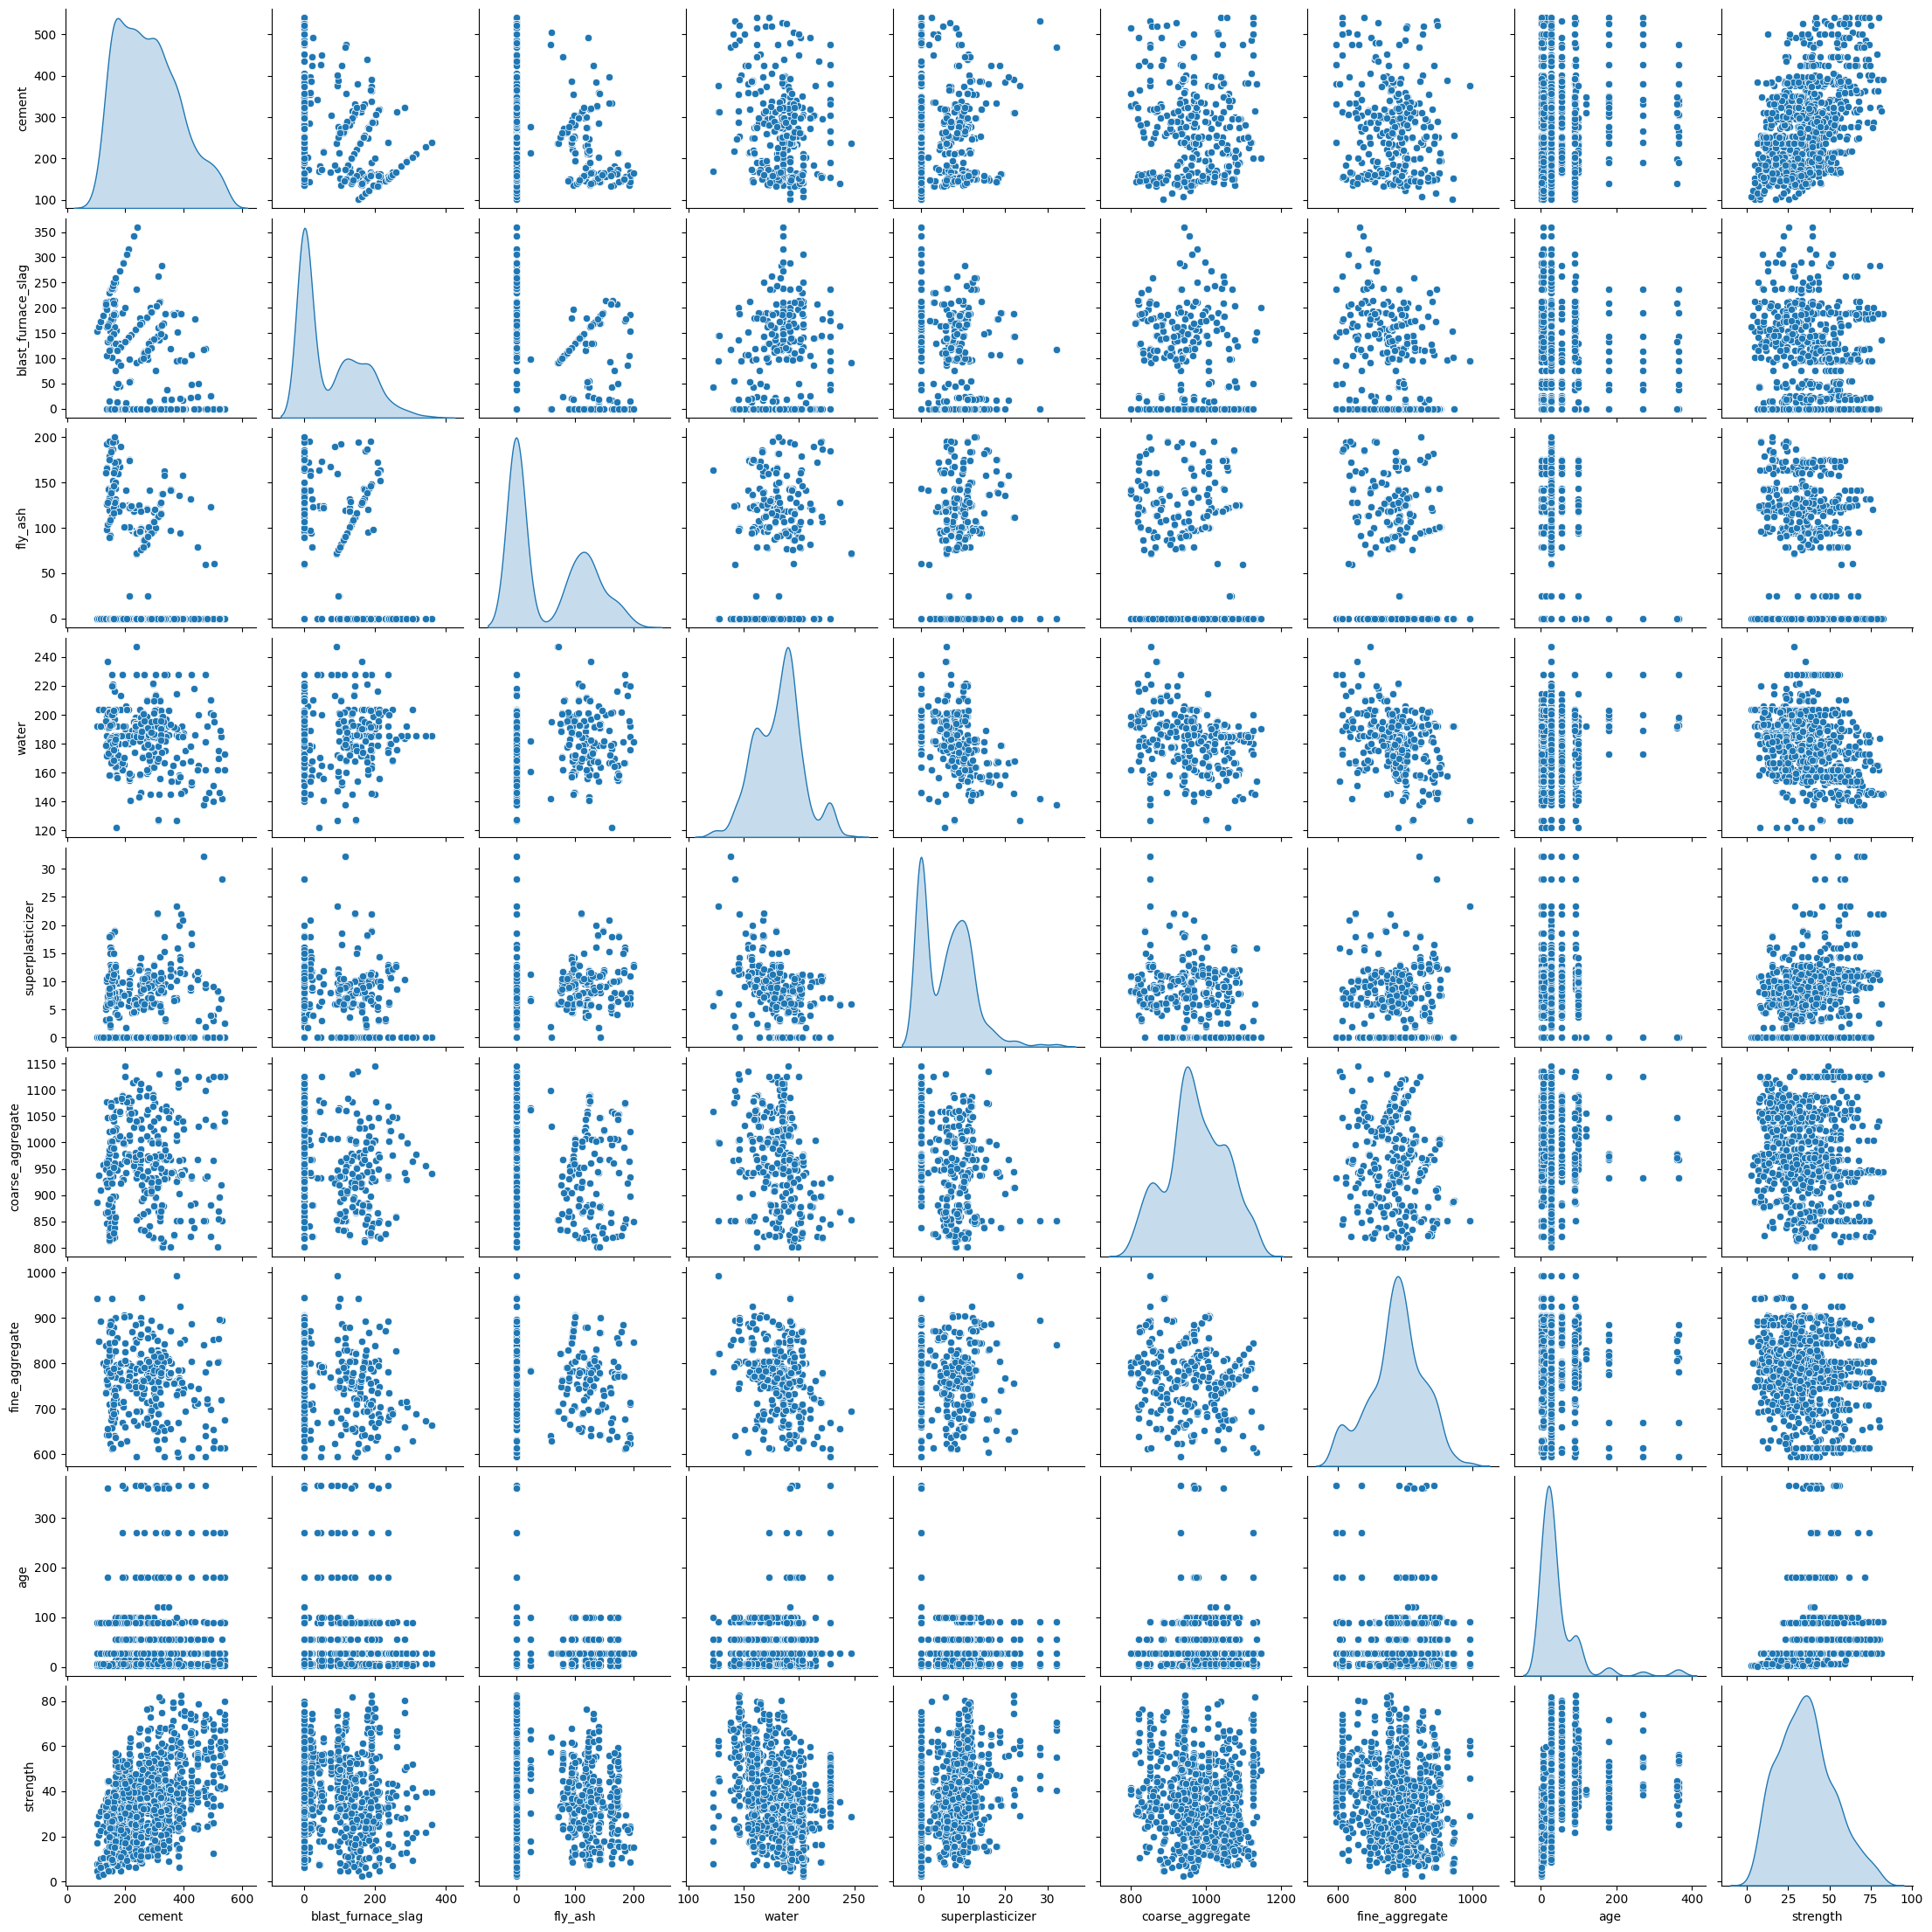

In [25]:
# Visualizing relationships (optional, you can run it once to see the graph)
print("\nGenerando pairplot para inspección de datos...")
sb.pairplot(raw_dataset[column_names], diag_kind='kde')
plt.show()

In [26]:
print("\nMeans and standard deviations before normalization:")
print(raw_dataset.describe().transpose()[['mean', 'std']])


Means and standard deviations before normalization:
                          mean         std
cement              281.165631  104.507142
blast_furnace_slag   73.895485   86.279104
fly_ash              54.187136   63.996469
water               181.566359   21.355567
superplasticizer      6.203112    5.973492
coarse_aggregate    972.918592   77.753818
fine_aggregate      773.578883   80.175427
age                  45.662136   63.169912
strength             35.817836   16.705679


In [27]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(raw_dataset.drop(columns=['strength']))

In [28]:
normalized_dataset = pd.DataFrame(normalized_data, columns=raw_dataset.drop(columns=['strength']).columns)
normalized_dataset['strength'] = raw_dataset['strength']

In [29]:
print("\nfirst 5 rows of the normalized dataset:")
print(normalized_dataset.head())
print("\nDescription of the normalized dataset (to see ranges from 0 to 1 in features):")
print(normalized_dataset.describe().transpose())


first 5 rows of the normalized dataset:
     cement  blast_furnace_slag  fly_ash     water  superplasticizer  \
0  1.000000            0.000000      0.0  0.321357           0.07764   
1  1.000000            0.000000      0.0  0.321357           0.07764   
2  0.526256            0.396494      0.0  0.848303           0.00000   
3  0.526256            0.396494      0.0  0.848303           0.00000   
4  0.220548            0.368392      0.0  0.560878           0.00000   

   coarse_aggregate  fine_aggregate       age   strength  
0          0.694767        0.205720  0.074176  79.986111  
1          0.738372        0.205720  0.074176  61.887366  
2          0.380814        0.000000  0.739011  40.269535  
3          0.380814        0.000000  1.000000  41.052780  
4          0.515698        0.580783  0.986264  44.296075  

Description of the normalized dataset (to see ranges from 0 to 1 in features):
                     count       mean        std       min        25%  \
cement             

## Split the data into training and test sets

In [30]:
train_dataset = normalized_dataset.sample(frac=0.8, random_state=0)
test_dataset = normalized_dataset.drop(train_dataset.index)

independent_variables = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
dependent_variables = ['strength']

train_set = train_dataset[independent_variables]
train_target = train_dataset[dependent_variables]
test_set = test_dataset[independent_variables]
test_target = test_dataset[dependent_variables]



Generando mapa de calor de correlación...


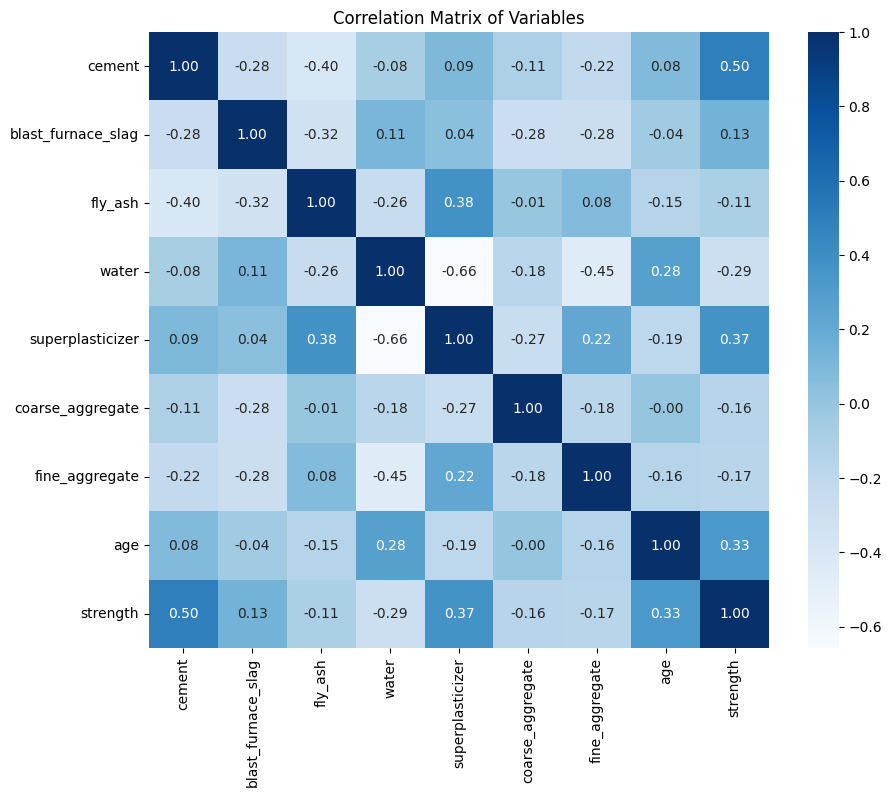

In [31]:
# Visualizing the correlation matrix (optional, you can run it once to see the graph)
print("\nGenerando mapa de calor de correlación...")
corr = raw_dataset.corr()
plt.figure(figsize=(10, 8)) # Adjust the size for better viewing
sb.heatmap(corr, cmap="Blues", annot=True, fmt=".2f") # fmt=".2f" 2 decimals
plt.title('Correlation Matrix of Variables')
plt.show()

## Neuronal Model

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(len(independent_variables),)),
    tf.keras.layers.Dense(units=64, activation='relu'), # First hidden layer
    tf.keras.layers.Dropout(0.2), # For regularization
    tf.keras.layers.Dense(units=64, activation='relu'), # Second hidden layer
    tf.keras.layers.Dropout(0.2), # For regularization
    tf.keras.layers.Dense(units=len(dependent_variables), activation=None) # Output layer with linear activation
])

# Define the optimizer (Adam)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the additional metrics
model.compile(
    loss='mse', # Mean Squared Error as a loss function
    optimizer=optimizer,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae') # Mean Absolute Error
    ]
)

# Display a summary of the model architecture
print("\nResumen de la arquitectura del modelo:")
model.summary()


Resumen de la arquitectura del modelo:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

## Setting up callbacks for training

In [33]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    min_delta=0.001,    # Minimal change considered an improvement
    patience=10,        # Number of epochs without improvement to stop training (you can increase to 10 or 15)
    restore_best_weights=True # Restore the weights of the best model (based on val_loss)
)

In [34]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Reduces the learning rate to 20%
    patience=5, # If there is no improvement in val_loss for 5 epochs
    min_lr=0.00001, # Minimum learning rate
    verbose=1 # To see when the rate is reduced
)

## Training Model

In [35]:
print("\nEntrenando el modelo...")
history = model.fit(
    train_set,
    train_target,
    epochs=200, # Increase peak times, EarlyStopping will take care of stopping it
    batch_size=16,
    validation_split=0.2, # 20% of the training set for validation
    callbacks=[earlystopping_callback, reduce_lr], # Add the LR reduction callback
    verbose=1 # Shows training progress
)


Entrenando el modelo...
Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1517.2762 - mae: 35.3161 - rmse: 38.9412 - val_loss: 1470.9808 - val_mae: 34.4645 - val_rmse: 38.3534 - learning_rate: 0.0010
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1203.8328 - mae: 30.5816 - rmse: 34.6798 - val_loss: 760.9275 - val_mae: 22.6034 - val_rmse: 27.5849 - learning_rate: 0.0010
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 513.6309 - mae: 18.2116 - rmse: 22.5351 - val_loss: 256.0179 - val_mae: 12.6226 - val_rmse: 16.0006 - learning_rate: 0.0010
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 246.9864 - mae: 12.6144 - rmse: 15.7024 - val_loss: 236.8121 - val_mae: 12.0974 - val_rmse: 15.3887 - learning_rate: 0.0010
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.8267 - mae: 12.3490 - rmse: 15.4453 - val_loss: 221.0017 - val_mae: 11.6938 - val_rmse: 14.8661 - learning_rate: 0.0010
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

## View training history

In [36]:
print("\nGenerating training history graphs...")
plt.figure(figsize=(15, 7))


Generating training history graphs...


<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

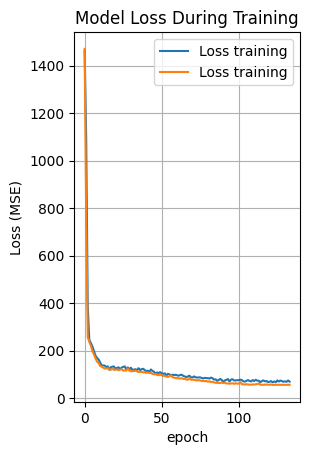

In [37]:
# Loss Chart
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss training')
plt.plot(history.history['val_loss'], label='Loss training')
plt.title('Model Loss During Training')
plt.xlabel('epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

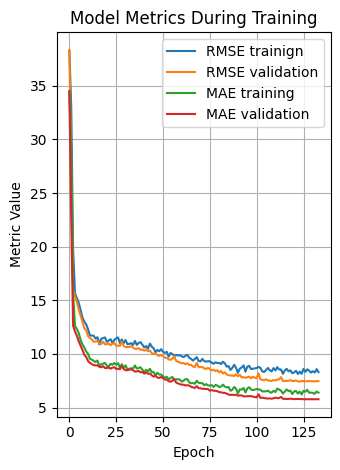

In [38]:
# Metrics Chart (RMSE and MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['rmse'], label='RMSE trainign')
plt.plot(history.history['val_rmse'], label='RMSE validation')
plt.plot(history.history['mae'], label='MAE training')
plt.plot(history.history['val_mae'], label='MAE validation')
plt.title('Model Metrics During Training')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluate the model

In [39]:
print("\nEvaluating the model on the test set (unseen data)...")
test_results = model.evaluate(test_set, test_target, verbose=0)
print(f"Loss (MSE) on the test set: {test_results[0]:.4f}")
print(f"RMSE on the test set: {test_results[1]:.4f}")
print(f"MAE on the test set: {test_results[2]:.4f}")


Evaluating the model on the test set (unseen data)...
Loss (MSE) on the test set: 55.4190
RMSE on the test set: 7.4444
MAE on the test set: 5.6535


## Make predictions and errors analysis

In [40]:
print("\nMaking predictions on the test set...")
test_predictions = model.predict(test_set).flatten()


Making predictions on the test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [41]:
r2 = r2_score(test_target, test_predictions)
print(f"R-squared (R²) in the test set: {r2:.4f}")

R-squared (R²) in the test set: 0.8124


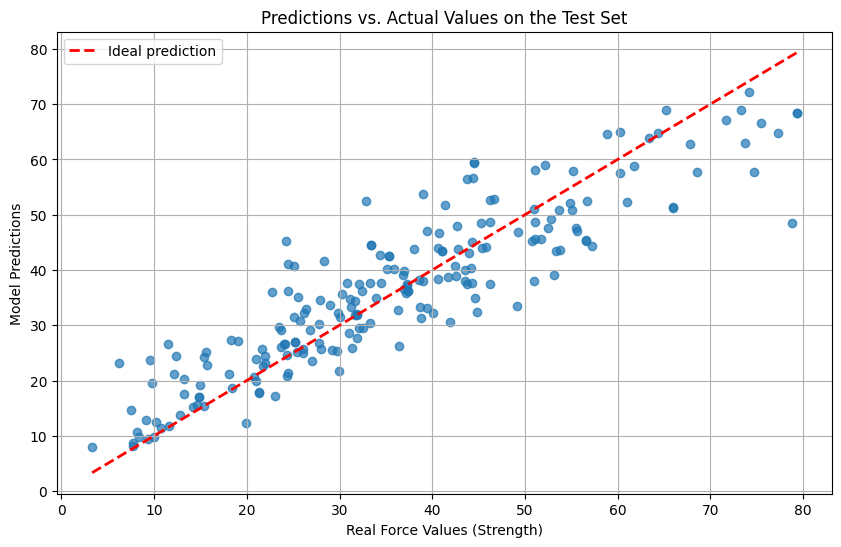

In [42]:
# Visualize Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(test_target, test_predictions, alpha=0.7)
# Ideal line where Prediction == Actual
min_val = min(test_target['strength'].min(), test_predictions.min())
max_val = max(test_target['strength'].max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal prediction')
plt.xlabel('Real Force Values (Strength)')
plt.ylabel('Model Predictions')
plt.title('Predictions vs. Actual Values ​​on the Test Set')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
# Display a DataFrame with actual vs. predicted (first 10 rows)
predictions_df = pd.DataFrame({'Real': test_target['strength'].values.flatten(), 'Prediction': test_predictions})
predictions_df['Absolute Error'] = np.abs(predictions_df['Real'] - predictions_df['Prediction'])
print("\nSome comparisons of predictions and errors:")
print(predictions_df.head(10))


Some comparisons of predictions and errors:
        Real  Prediction  Absolute Error
0  28.021684   25.771414        2.250270
1  42.620648   48.000248        5.379600
2  44.207822   40.303791        3.904031
3  53.300632   43.492821        9.807811
4  37.427515   36.248638        1.178877
5  41.719503   38.647671        3.071833
6  30.079769   31.569761        1.489992
7  43.698299   56.369801       12.671501
8  38.995384   53.685749       14.690365
9  53.104131   39.094707       14.009424


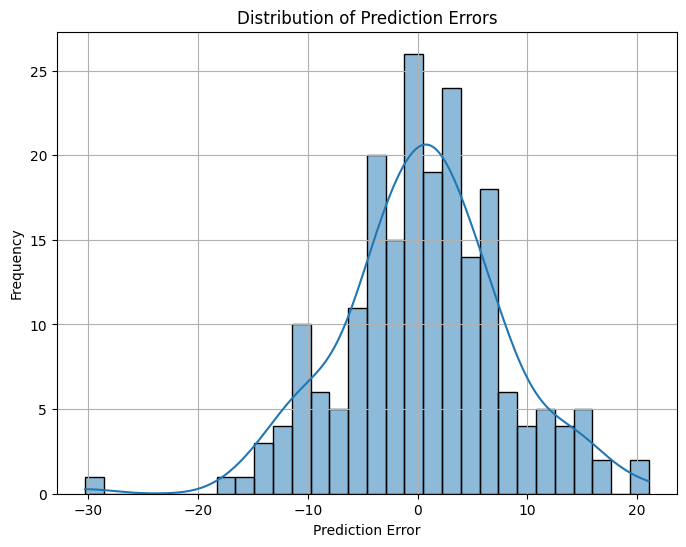


Mean Absolute Error (MAE) of errors: 5.6535
Standard Deviation of Errors: 7.4288


In [44]:
# Error Distribution
errors = test_predictions - test_target['strength'].values.flatten()
plt.figure(figsize=(8, 6))
sb.histplot(errors, bins=30, kde=True) # kde=True to see the density estimate
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

print(f"\nMean Absolute Error (MAE) of errors: {np.mean(np.abs(errors)):.4f}")
print(f"Standard Deviation of Errors: {np.std(errors):.4f}")

# Third Model

## Get the data

In [45]:
column_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'strength']

raw_dataset = pd.read_excel('Concrete_Data.xls', names=column_names)

In [46]:
# Initial data check (you can uncomment to see the output))
print("Initial description of the dataset:")
print(raw_dataset.describe().transpose())
print("\nDataset columns:")
print(raw_dataset.columns)
print("\nFirst 5 rows of the dataset:")
print(raw_dataset.head())

Initial description of the dataset:
                     count        mean         std         min         25%  \
cement              1030.0  281.165631  104.507142  102.000000  192.375000   
blast_furnace_slag  1030.0   73.895485   86.279104    0.000000    0.000000   
fly_ash             1030.0   54.187136   63.996469    0.000000    0.000000   
water               1030.0  181.566359   21.355567  121.750000  164.900000   
superplasticizer    1030.0    6.203112    5.973492    0.000000    0.000000   
coarse_aggregate    1030.0  972.918592   77.753818  801.000000  932.000000   
fine_aggregate      1030.0  773.578883   80.175427  594.000000  730.950000   
age                 1030.0   45.662136   63.169912    1.000000    7.000000   
strength            1030.0   35.817836   16.705679    2.331808   23.707115   

                           50%          75%          max  
cement              272.900000   350.000000   540.000000  
blast_furnace_slag   22.000000   142.950000   359.400000  
fly_as

## Inspect the data and Normalization


Generando pairplot para inspección de datos...


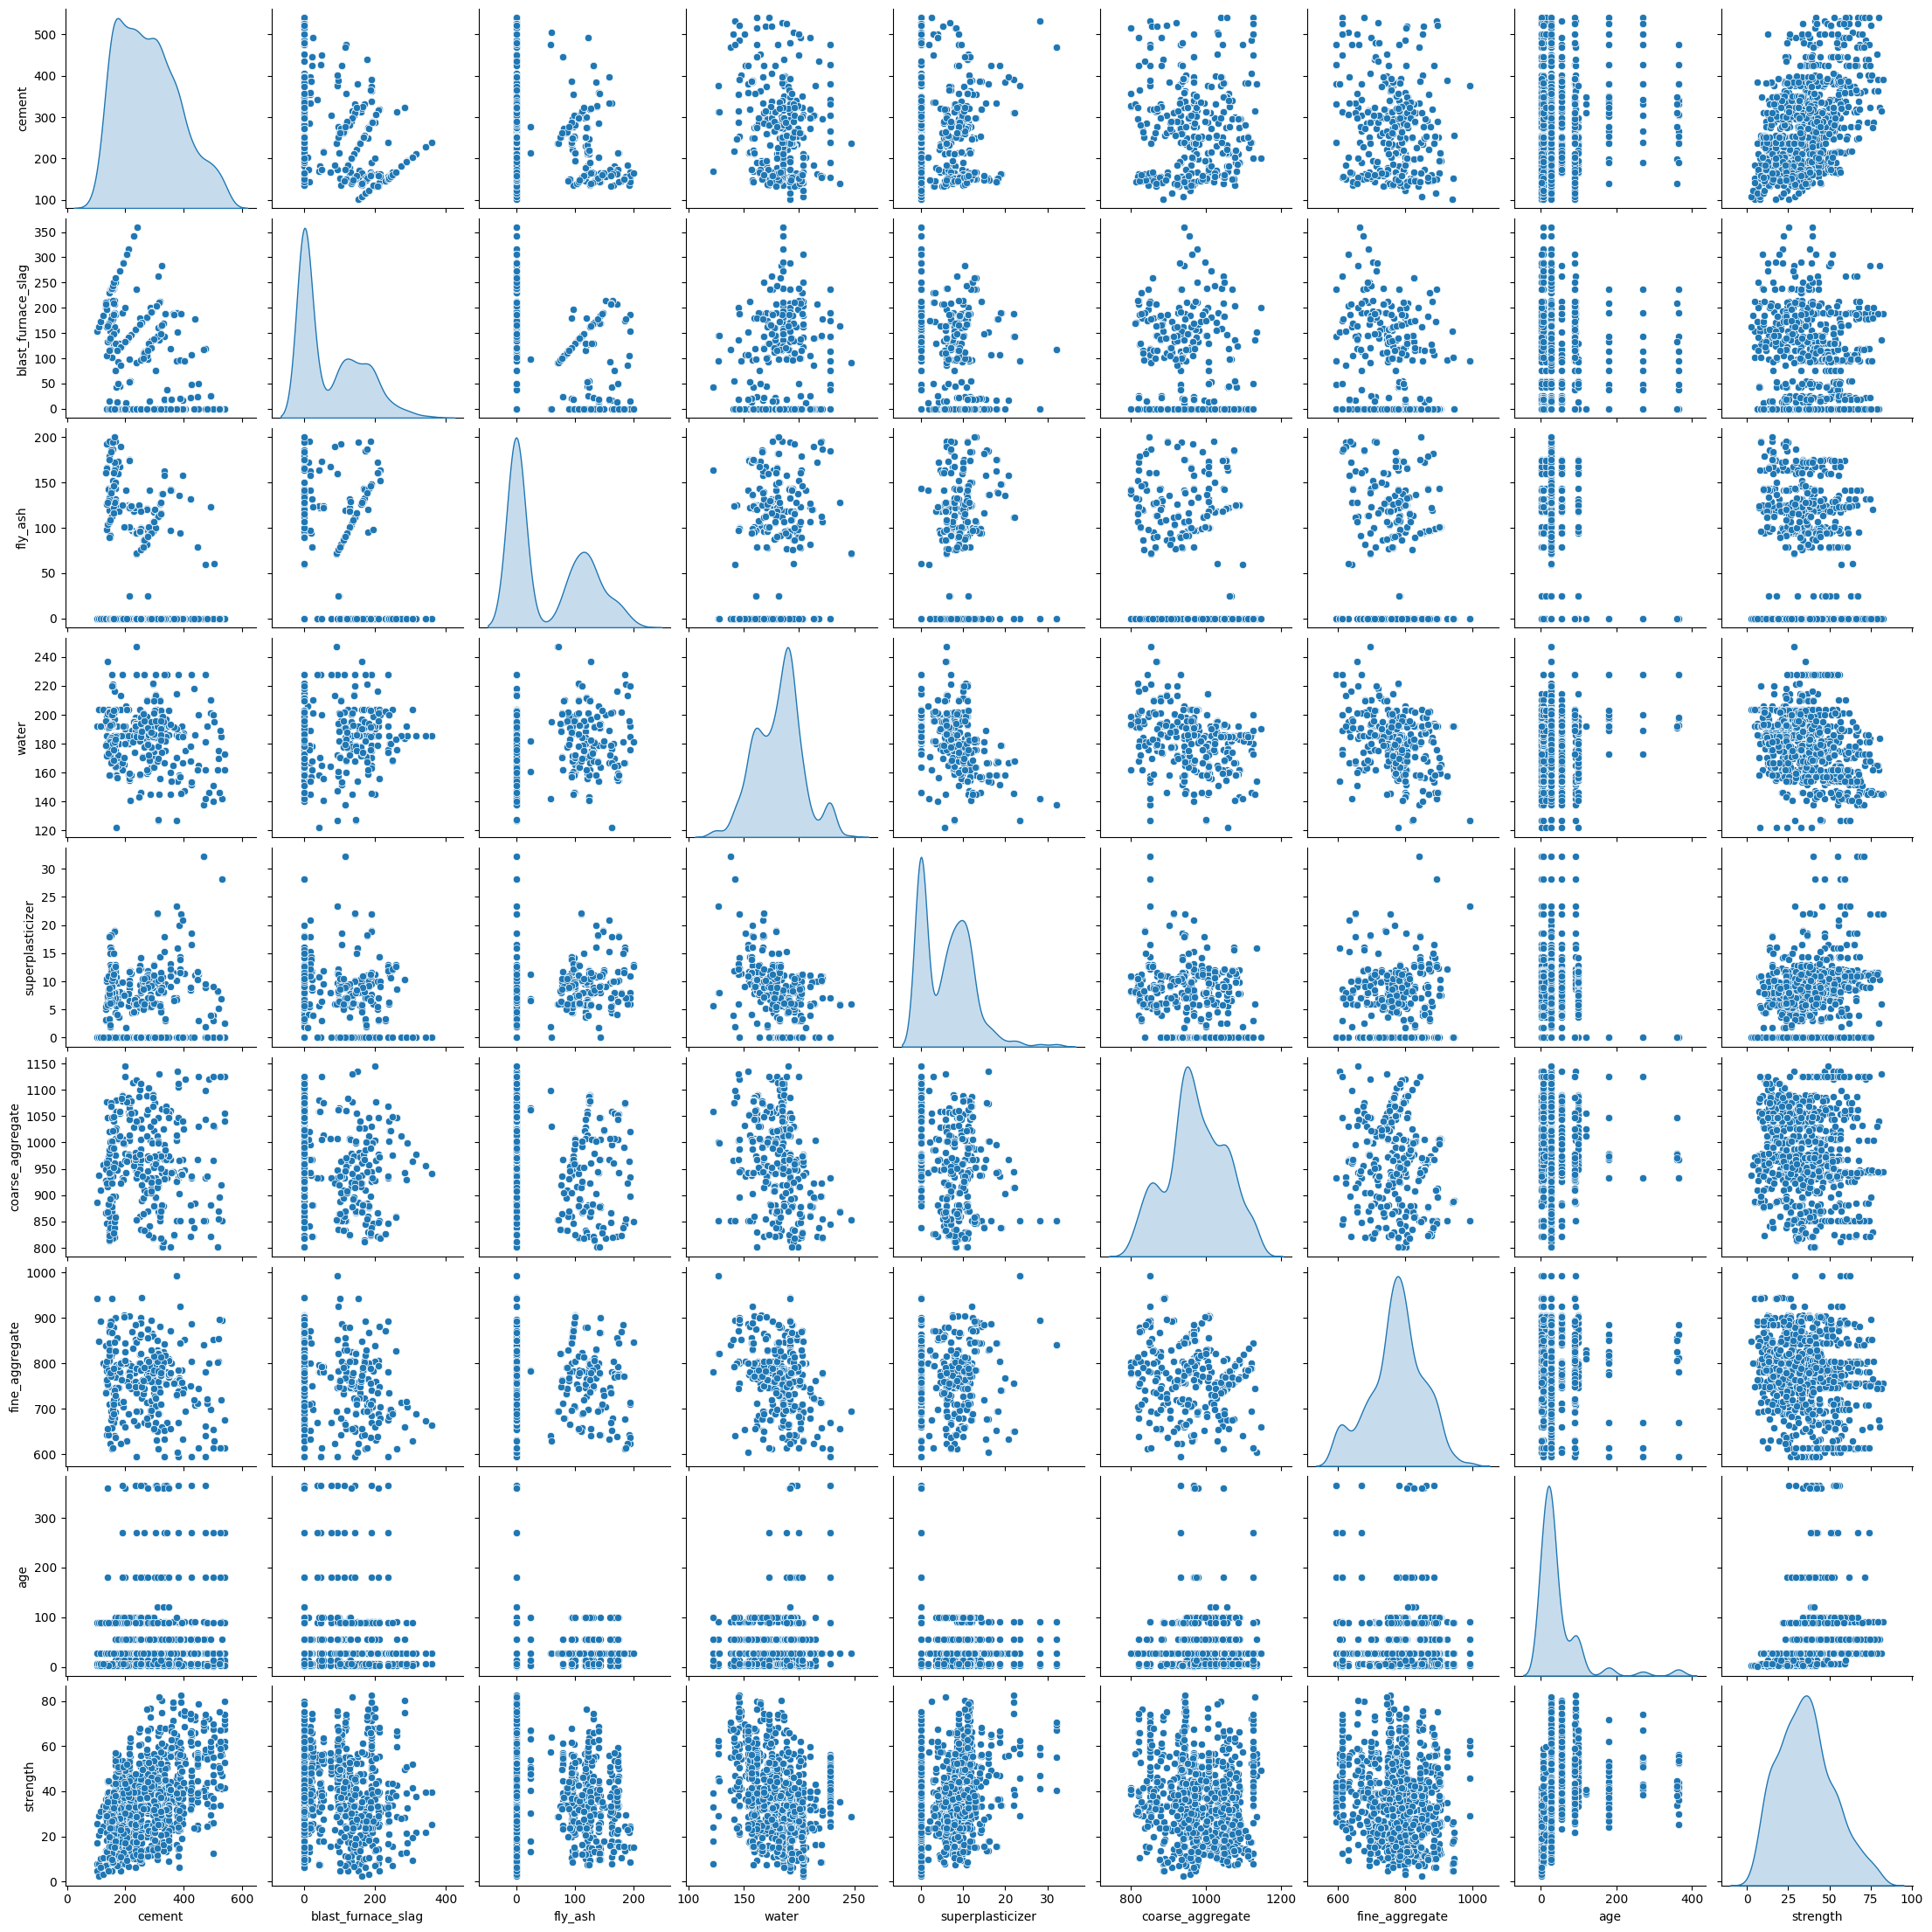

In [47]:
# Visualizing relationships (optional, you can run it once to see the graph)
print("\nGenerando pairplot para inspección de datos...")
sb.pairplot(raw_dataset[column_names], diag_kind='kde')
plt.show()

In [48]:
print("\nMeans and standard deviations before normalization:")
print(raw_dataset.describe().transpose()[['mean', 'std']])


Means and standard deviations before normalization:
                          mean         std
cement              281.165631  104.507142
blast_furnace_slag   73.895485   86.279104
fly_ash              54.187136   63.996469
water               181.566359   21.355567
superplasticizer      6.203112    5.973492
coarse_aggregate    972.918592   77.753818
fine_aggregate      773.578883   80.175427
age                  45.662136   63.169912
strength             35.817836   16.705679


In [49]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(raw_dataset.drop(columns=['strength']))

In [50]:
normalized_dataset = pd.DataFrame(normalized_data, columns=raw_dataset.drop(columns=['strength']).columns)
normalized_dataset['strength'] = raw_dataset['strength']

In [51]:
print("\nfirst 5 rows of the normalized dataset:")
print(normalized_dataset.head())
print("\nDescription of the normalized dataset (to see ranges from 0 to 1 in features):")
print(normalized_dataset.describe().transpose())


first 5 rows of the normalized dataset:
     cement  blast_furnace_slag  fly_ash     water  superplasticizer  \
0  1.000000            0.000000      0.0  0.321357           0.07764   
1  1.000000            0.000000      0.0  0.321357           0.07764   
2  0.526256            0.396494      0.0  0.848303           0.00000   
3  0.526256            0.396494      0.0  0.848303           0.00000   
4  0.220548            0.368392      0.0  0.560878           0.00000   

   coarse_aggregate  fine_aggregate       age   strength  
0          0.694767        0.205720  0.074176  79.986111  
1          0.738372        0.205720  0.074176  61.887366  
2          0.380814        0.000000  0.739011  40.269535  
3          0.380814        0.000000  1.000000  41.052780  
4          0.515698        0.580783  0.986264  44.296075  

Description of the normalized dataset (to see ranges from 0 to 1 in features):
                     count       mean        std       min        25%  \
cement             

## Split the data into training and test sets

In [52]:
train_dataset = normalized_dataset.sample(frac=0.8, random_state=0)
test_dataset = normalized_dataset.drop(train_dataset.index)

independent_variables = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
dependent_variables = ['strength']

train_set = train_dataset[independent_variables]
train_target = train_dataset[dependent_variables]
test_set = test_dataset[independent_variables]
test_target = test_dataset[dependent_variables]



Generando mapa de calor de correlación...


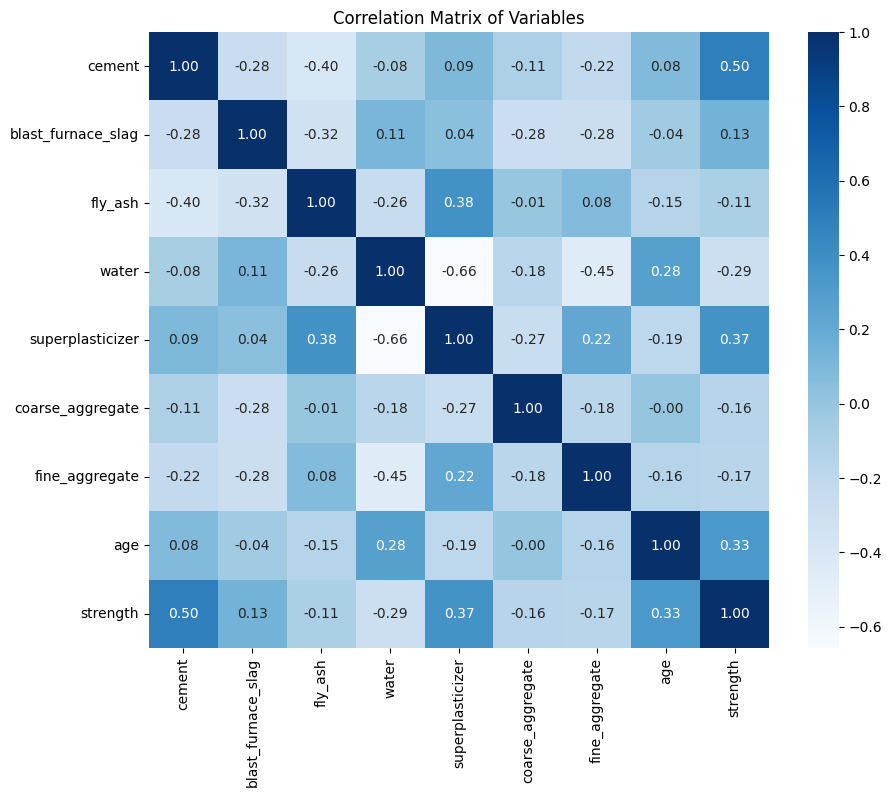

In [53]:
# Visualizing the correlation matrix (optional, you can run it once to see the graph)
print("\nGenerando mapa de calor de correlación...")
corr = raw_dataset.corr()
plt.figure(figsize=(10, 8)) # Adjust the size for better viewing
sb.heatmap(corr, cmap="Blues", annot=True, fmt=".2f") # fmt=".2f" 2 decimals
plt.title('Correlation Matrix of Variables')
plt.show()

## Neuronal Model

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(len(independent_variables),)),
    tf.keras.layers.Dense(units=64, activation='relu'), # First hidden layer
    tf.keras.layers.Dropout(0.2), # For regularization
    tf.keras.layers.Dense(units=32, activation='relu'), # Second hidden layer
    tf.keras.layers.Dropout(0.2), # For regularization
    tf.keras.layers.Dense(units=32, activation='relu'), # Second hidden layer
    tf.keras.layers.Dense(units=len(dependent_variables), activation='relu') # Output layer with linear activation
])

# Define the optimizer (Adam)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the additional metrics
model.compile(
    loss='mse', # Mean Squared Error as a loss function
    optimizer=optimizer,
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae') # Mean Absolute Error
    ]
)

# Display a summary of the model architecture
print("\nResumen de la arquitectura del modelo:")
model.summary()


Resumen de la arquitectura del modelo:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,745 (14.63 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

## Setting up callbacks for training

In [55]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    min_delta=0.001,    # Minimal change considered an improvement
    patience=10,        # Number of epochs without improvement to stop training (you can increase to 10 or 15)
    restore_best_weights=True # Restore the weights of the best model (based on val_loss)
)

In [56]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Reduces the learning rate to 20%
    patience=5, # If there is no improvement in val_loss for 5 epochs
    min_lr=0.00001, # Minimum learning rate
    verbose=1 # To see when the rate is reduced
)

## Training Model

In [57]:
print("\nEntrenando el modelo...")
history = model.fit(
    train_set,
    train_target,
    epochs=150, # Increase peak times, EarlyStopping will take care of stopping it
    batch_size=16,
    validation_split=0.2, # 20% of the training set for validation
    callbacks=[earlystopping_callback, reduce_lr], # Add the LR reduction callback
    verbose=1 # Shows training progress
)


Entrenando el modelo...
Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1455.9248 - mae: 34.3184 - rmse: 38.1254 - val_loss: 1528.3887 - val_mae: 35.2954 - val_rmse: 39.0946 - learning_rate: 0.0010
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1347.0814 - mae: 32.6973 - rmse: 36.6710 - val_loss: 722.5057 - val_mae: 21.8954 - val_rmse: 26.8795 - learning_rate: 0.0010
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 484.2468 - mae: 16.9616 - rmse: 21.8524 - val_loss: 238.5792 - val_mae: 12.2214 - val_rmse: 15.4460 - learning_rate: 0.0010
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 253.1012 - mae: 13.0191 - rmse: 15.8946 - val_loss: 217.6187 - val_mae: 11.6042 - val_rmse: 14.7519 - learning_rate: 0.0010
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223.0748 - mae: 11.8402 - rmse: 14.9243 - val_loss: 185.1016 - val_mae: 10.8104 - val_rmse: 13.6052 - learning_rate: 0.0010
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

## View training history

In [58]:
print("\nGenerating training history graphs...")
plt.figure(figsize=(15, 7))


Generating training history graphs...


<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

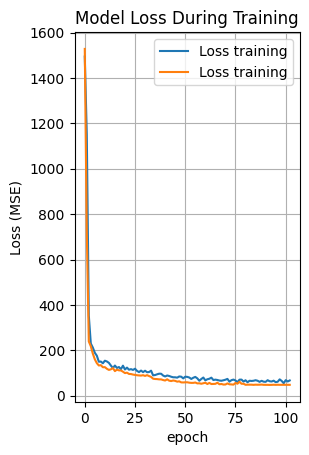

In [59]:
# Loss Chart
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss training')
plt.plot(history.history['val_loss'], label='Loss training')
plt.title('Model Loss During Training')
plt.xlabel('epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

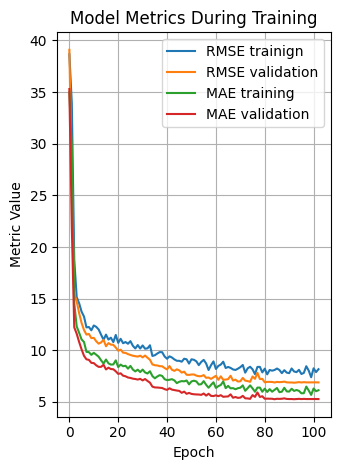

In [60]:
# Metrics Chart (RMSE and MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['rmse'], label='RMSE trainign')
plt.plot(history.history['val_rmse'], label='RMSE validation')
plt.plot(history.history['mae'], label='MAE training')
plt.plot(history.history['val_mae'], label='MAE validation')
plt.title('Model Metrics During Training')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluate the Model

In [61]:
print("\nEvaluating the model on the test set (unseen data)...")
test_results = model.evaluate(test_set, test_target, verbose=0)
print(f"Loss (MSE) on the test set: {test_results[0]:.4f}")
print(f"RMSE on the test set: {test_results[1]:.4f}")
print(f"MAE on the test set: {test_results[2]:.4f}")


Evaluating the model on the test set (unseen data)...
Loss (MSE) on the test set: 49.1129
RMSE on the test set: 7.0081
MAE on the test set: 5.2524


## Make Predictions and errors

In [72]:
print("\nMaking predictions on the test set...")
test_predictions = model.predict(test_set).flatten()


Making predictions on the test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [63]:
r2 = r2_score(test_target, test_predictions)
print(f"R-squared (R²) in the test set: {r2:.4f}")

R-squared (R²) in the test set: 0.8337


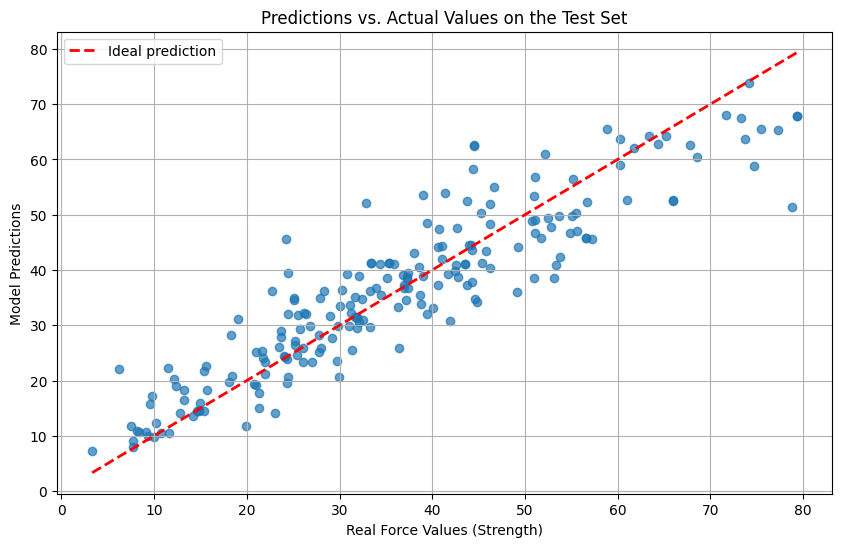

In [64]:
# Visualize Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(test_target, test_predictions, alpha=0.7)
# Ideal line where Prediction == Actual
min_val = min(test_target['strength'].min(), test_predictions.min())
max_val = max(test_target['strength'].max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal prediction')
plt.xlabel('Real Force Values (Strength)')
plt.ylabel('Model Predictions')
plt.title('Predictions vs. Actual Values ​​on the Test Set')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
# Display a DataFrame with actual vs. predicted (first 10 rows)
predictions_df = pd.DataFrame({'Real': test_target['strength'].values.flatten(), 'Prediction': test_predictions})
predictions_df['Absolute Error'] = np.abs(predictions_df['Real'] - predictions_df['Prediction'])
print("\nSome comparisons of predictions and errors:")
print(predictions_df.head(10))


Some comparisons of predictions and errors:
        Real  Prediction  Absolute Error
0  28.021684   25.814915        2.206769
1  42.620648   47.620514        4.999866
2  44.207822   44.425667        0.217845
3  53.300632   40.906601       12.394031
4  37.427515   39.430016        2.002500
5  41.719503   39.268806        2.450697
6  30.079769   33.476780        3.397010
7  43.698299   52.473736        8.775436
8  38.995384   53.593262       14.597878
9  53.104131   38.548252       14.555879


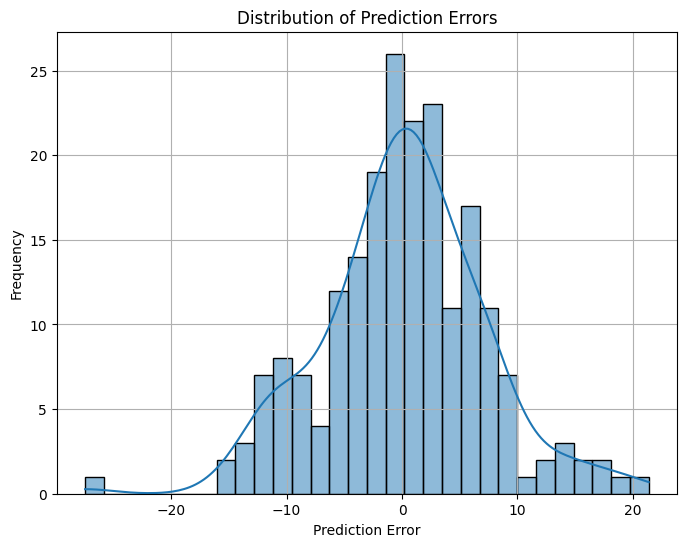


Mean Absolute Error (MAE) of errors: 5.2524
Standard Deviation of Errors: 7.0066


In [66]:
# Error Distribution
errors = test_predictions - test_target['strength'].values.flatten()
plt.figure(figsize=(8, 6))
sb.histplot(errors, bins=30, kde=True) # kde=True to see the density estimate
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

print(f"\nMean Absolute Error (MAE) of errors: {np.mean(np.abs(errors)):.4f}")
print(f"Standard Deviation of Errors: {np.std(errors):.4f}")